In [84]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [85]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

In [86]:
def model():
    inputs = layers.Input(shape= [64,64,1])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)
    
    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

In [87]:
model = model()
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 sequential_60 (Sequential)     (None, 32, 32, 128)  1280        ['input_7[0][0]']                
                                                                                                  
 sequential_61 (Sequential)     (None, 16, 16, 128)  147584      ['sequential_60[0][0]']          
                                                                                                  
 sequential_62 (Sequential)     (None, 8, 8, 256)    296192      ['sequential_61[0][0]']          
                                                                                            

In [88]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])


In [89]:
train_path="D:\College 4\Selected\A5\Pet\Train"
test_path="D:\College 4\Selected\A5\Pet\Test"

In [90]:
train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        train.append(img_arr)

test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        test.append(img_arr)

In [91]:
X_train = np.array(train)
X_test = np.array(test)
X_train=X_train[:20,:]
X_train.shape

(20, 64, 64, 3)

In [92]:
print(X_train.shape)
print(X_test.shape)

(20, 64, 64, 3)
(24, 64, 64, 3)


In [93]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [94]:
X_train_gray = X_train.copy()

In [95]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [96]:
photos = []
for i in X_train_gray:
     photos.append(rgb2gray(i))
photos = np.array(photos)  
photos.shape   

(20, 64, 64)

In [97]:
print(X_train.shape)
print(X_test.shape)

(20, 64, 64, 3)
(24, 64, 64, 3)


In [98]:
model.fit(photos, X_train, epochs = 100,batch_size = 50,verbose = 0)

In [99]:
p1 =model.predict(photos)

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

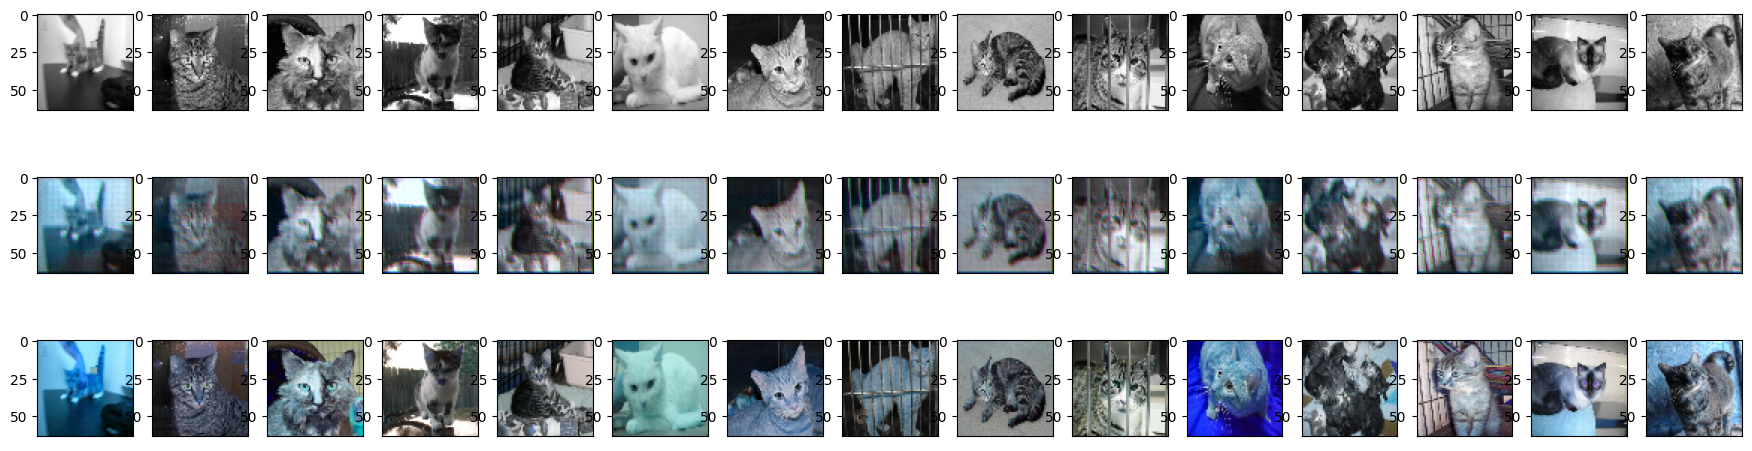

In [102]:
n=15
plt.figure(figsize=(22,6))
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(photos[i],cmap=plt.get_cmap('gray'))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax=plt.subplot(3,n,i+1+n)
    plt.imshow(p1[i])
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax=plt.subplot(3,n,i+1+n*2)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()